In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("dataset-resized",
                                           target_size = (224, 224), batch_size = 32 , class_mode="categorical")

Found 2527 images belonging to 6 classes.


In [6]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
    layer.trainable = False

In [8]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [9]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 6, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 20, steps_per_epoch=len(train_data))

Epoch 1/20
79/79 [==============================] - 742s 9s/step - loss: 1.5669 - acc: 0.4100
Epoch 2/20
79/79 [==============================] - 745s 9s/step - loss: 1.2842 - acc: 0.4923
Epoch 3/20
79/79 [==============================] - 730s 9s/step - loss: 1.1264 - acc: 0.5651
Epoch 4/20
79/79 [==============================] - 743s 9s/step - loss: 1.0647 - acc: 0.5853
Epoch 5/20
79/79 [==============================] - 776s 10s/step - loss: 1.0519 - acc: 0.6055
Epoch 6/20
79/79 [==============================] - 400s 5s/step - loss: 0.9505 - acc: 0.6363
Epoch 7/20
79/79 [==============================] - 421s 5s/step - loss: 0.9048 - acc: 0.6648
Epoch 8/20
79/79 [==============================] - 422s 5s/step - loss: 0.8810 - acc: 0.6735
Epoch 9/20
79/79 [==============================] - 425s 5s/step - loss: 0.9544 - acc: 0.6522
Epoch 10/20
79/79 [==============================] - 429s 5s/step - loss: 0.8533 - acc: 0.6795
Epoch 11/20
79/79 [==============================] - 392s 

In [11]:
from tensorflow.keras.preprocessing import image
output_class = ["Cardboard", "Glass", "Metal", "Paper", "Plastic", "Trash"]
def waste_prediction(new_image):
    test_image = image.load_img(new_image, target_size = (224,224))
    plt.axis("off")
    plt.imshow(test_image)
    plt.show()
    
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)

    predicted_array = model.predict(test_image)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)
    
    print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

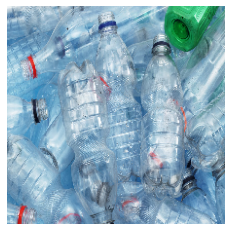

Your waste material is  Plastic  with  97.67  % accuracy


In [19]:
waste_prediction("Plastic_bottle.jpg")

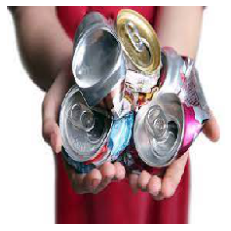

Your waste material is  Metal  with  51.1  % accuracy


In [13]:
waste_prediction("pb5.jpg")

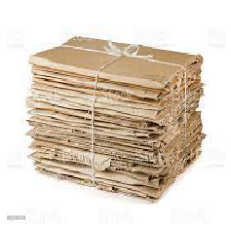

Your waste material is  Cardboard  with  91.24  % accuracy


In [32]:
waste_prediction("card.jpg")

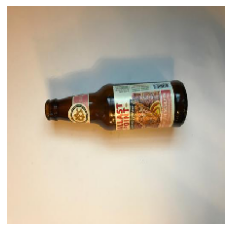

Your waste material is  Glass  with  99.86  % accuracy


In [33]:
waste_prediction("glass.jpg")

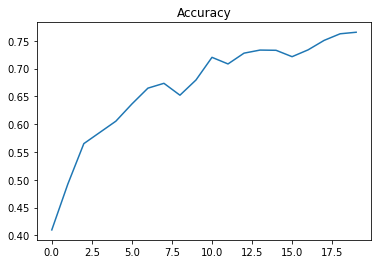

In [34]:
plt.title("Accuracy")
plt.plot(result.history['acc'])
plt.show()

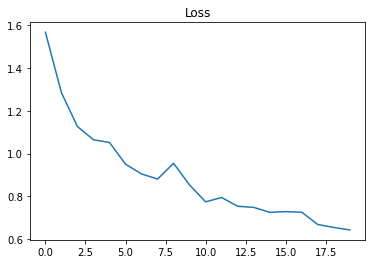

In [35]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [36]:
model.save("classifyWaste.h5")